## First probblem set

In [1]:
import cv2
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

define the constant varibles: width, height, and color of the traingle

In [2]:
COLOR = '#329ea8'
HEIGHT_SIZE = 30
WIDTH_SIZE = 40 

Reading and displaying the original image (p1.1)

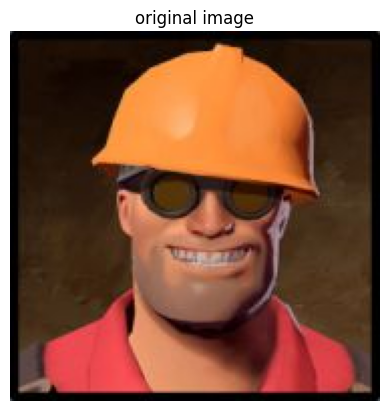

In [3]:
img = cv2.imread("tf2_engineer.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("original image")
plt.axis('off')
plt.show()

Reading and printing the center of an image (p1.2)

In [4]:
height, width, _ = img.shape
center_y, center_x = height // 2, width // 2
center_pixel = img[center_y, center_x] 

print(f"Intesity of centered pixel: {center_pixel}")

Intesity of centered pixel: [ 67  92 172]


In [5]:
# Getting dimenstions (relative to center)
Y1 = max(center_y - HEIGHT_SIZE // 2, 0)
X1 = max(center_x - WIDTH_SIZE // 2, 0)
Y2 = min(center_y + HEIGHT_SIZE // 2, height)
X2 = min(center_x + WIDTH_SIZE // 2, width)

In [6]:
# Converting the color format
rgb = mcolors.to_rgb(COLOR)
bgr = tuple(int(c * 255) for c in rgb[::-1])

Drawing a rectangle using the function provided by opencv (p1.3)

In [7]:
cv2.rectangle(img, (X1, Y1), (X2, Y2), bgr, thickness=-1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Print the intensity value at the centre of the colour patch (p1.4)

In [8]:
center_y, center_x = height // 2, width // 2
center_pixel = img[center_y, center_x] 

print(f"Intesity of centered pixel: {center_pixel}")

Intesity of centered pixel: [168 158  50]


Displaying the new image with rectangle (p1.5)

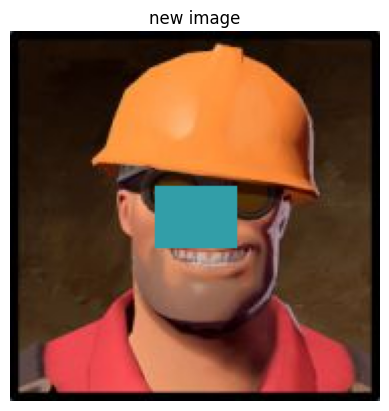

In [9]:
plt.imshow(img_rgb)
plt.title("new image")
plt.axis('off')
plt.show()

## Second problem set

In [10]:
import cv2
import matplotlib.pyplot as plt
import random

Reading and displaying the image (p2.1)

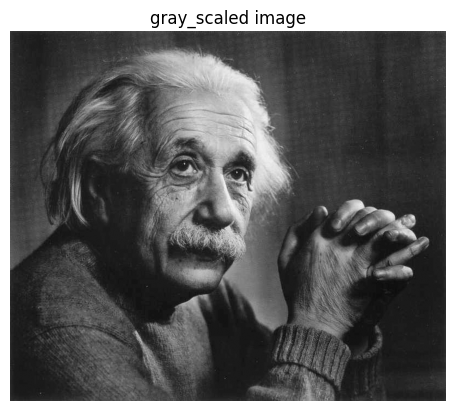

In [11]:
img = cv2.imread("einstein.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.title("gray_scaled image")
plt.axis('off')
plt.show()

Find the negative of the input image (p2.2)

In [12]:
negative_img = 255 - img

Display the negative image (p2.3)

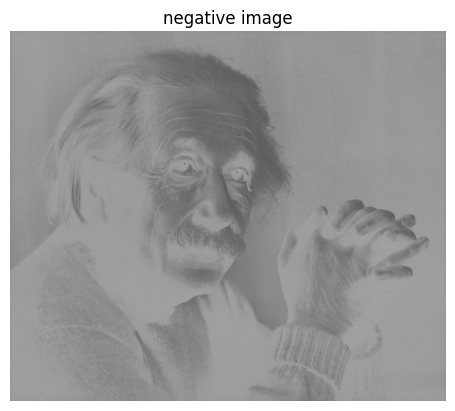

In [13]:
img_rgb = cv2.cvtColor(negative_img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("negative image")
plt.axis('off')
plt.show()

Comparing 5 random pixles from the original and negative (2.4)

In [ ]:
height, width = img.shape

random_pixels = [(random.randint(0, height - 1), random.randint(0, width - 1)) for _ in range(5)]

for (y, x) in random_pixels:
    original_val = img[y, x]
    negative_val = negative_img[y, x]
    print(f"Before = {original_val} -> After = {negative_val}")

## Third problem set

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Reading and displaying the image (p3.1)

In [ ]:
img = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.title("gray_scaled image")
plt.axis('off')
plt.show()

Apply log transform (p3.2)

In [ ]:
c = 255 / np.log(1 + np.max(img))
transformed_img = c * np.log(1 + img)
# Display the log-transformed image
plt.figure(figsize=(6,6))
plt.imshow(transformed_img, cmap='gray')
plt.title("Log Transformed Image")
plt.axis('off')
plt.show()

Apply inverse log transform to original image (p3.3)

In [ ]:
inv_log_image = np.exp(img / c) - 1

plt.figure(figsize=(6,6))
plt.imshow(inv_log_image, cmap='gray')
plt.title("Inverse Log Transformed Image")
plt.axis('off')
plt.show()

Apply inverse log transform on log-transformed image (p3.4)

In [ ]:
c = 255 / np.log(1 + np.min(transformed_img))
inv_log_image = np.exp(transformed_img / c) - 1

plt.figure(figsize=(6,6))
plt.imshow(inv_log_image, cmap='gray')
plt.title("Inverse Log Transformed log-transformed Image")
plt.axis('off')
plt.show()

(p3.5) Comment: It looks very much to the original image as if nothing is applied 

## Fourth problem set

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Display and show the image (p4.1)

In [ ]:
img = cv2.imread("moon.tif", cv2.IMREAD_GRAYSCALE)
img_float = img.astype(np.float32)

plt.imshow(img, cmap="gray")
plt.title("gray_scaled image")
plt.axis('off')
plt.show()

unsharp masking in spatial domain (p4.2)

In [ ]:
# Used by spatial and frequency masking
k_values = [0.5, 2.0, 4.0]

# --- Spatial Unsharp Masking ---
blurred = cv2.GaussianBlur(img_float, (5, 5), 0)
mask = img_float - blurred
spatial_images = []

for k in k_values:
    # Spatial
    sharpened_spatial = img_float + k * mask
    sharpened_spatial = np.clip(sharpened_spatial, 0, 255).astype(np.uint8)
    spatial_images.append(sharpened_spatial)

unsharp masking in frequency domain (p4.3)

In [ ]:
# --- Frequency Unsharp Masking ---
freq_images = []
rows, cols = img.shape
dft = np.fft.fft2(img_float)
dft_shift = np.fft.fftshift(dft)

# High-pass filter
def create_ideal_high_pass(shape, D0):
    H = np.ones(shape, np.float32)
    for u in range(shape[0]):
        for v in range(shape[1]):
            D = np.sqrt((u - shape[0] // 2) ** 2 + (v - shape[1] // 2) ** 2)
            if D < D0:
                H[u, v] = 0
    return H

H_hp = create_ideal_high_pass(img.shape, D0=30)

for k in k_values:
    H = 1 + k * H_hp
    G = dft_shift * H
    g = np.fft.ifft2(np.fft.ifftshift(G))
    g = np.abs(g)
    g = np.clip(g, 0, 255).astype(np.uint8)
    freq_images.append(g)

display both spatial and frequency images (p4.4)

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

for col, k in enumerate(k_values):
    # Spatial image
    axs[0, col].imshow(spatial_images[col], cmap='gray')
    axs[0, col].set_title(f"k = {k}")
    axs[0, col].axis("off")

    # Frequency image
    axs[1, col].imshow(freq_images[col], cmap='gray')
    axs[1, col].axis("off")

axs[0, 0].set_ylabel("Spatial", fontsize=12)
axs[1, 0].set_ylabel("Frequency", fontsize=12)

plt.suptitle("Unsharp Masking: Spatial vs. Frequency Domains", fontsize=16)
plt.tight_layout()
plt.show()

## Fifth Problem Set

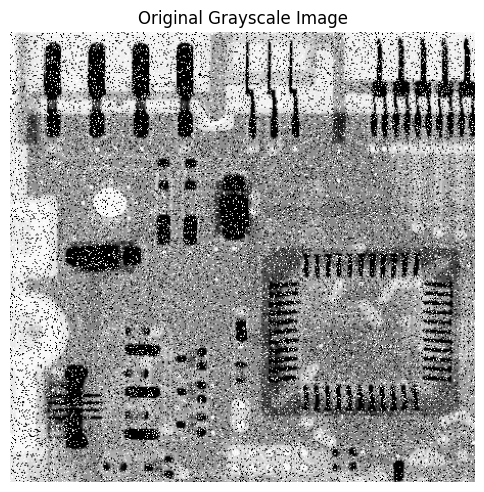

In [1]:
import cv2
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('pcb.tif', cv2.IMREAD_GRAYSCALE)

# Display the image
plt.figure(figsize=(6,6))
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

Displat the histogram image (p5.1)

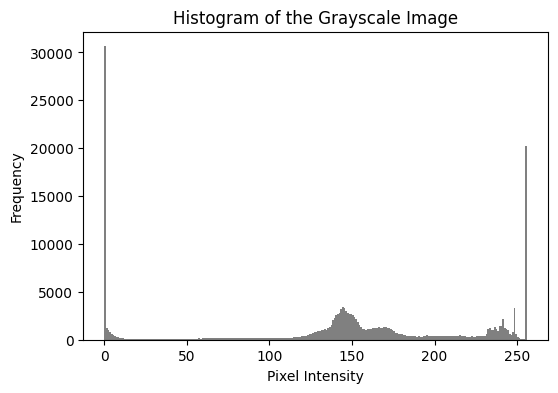

In [2]:
# Plot histogram
plt.figure(figsize=(6,4))
plt.hist(image.ravel(), bins=256, range=[0,256], color='gray')
plt.title('Histogram of the Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

Applying median filter

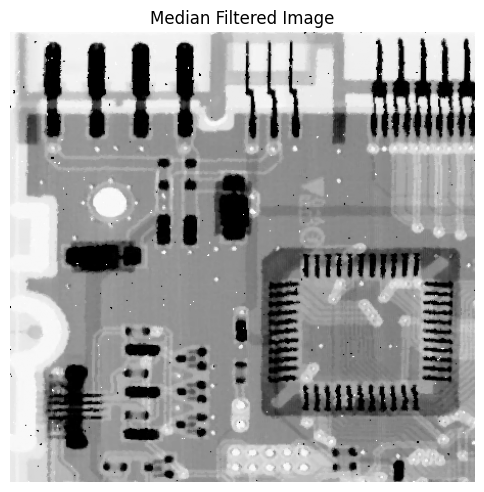

In [3]:
median_filtered = cv2.medianBlur(image, 3)

plt.figure(figsize=(6,6))
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')
plt.show()

Applying Gaussian filter

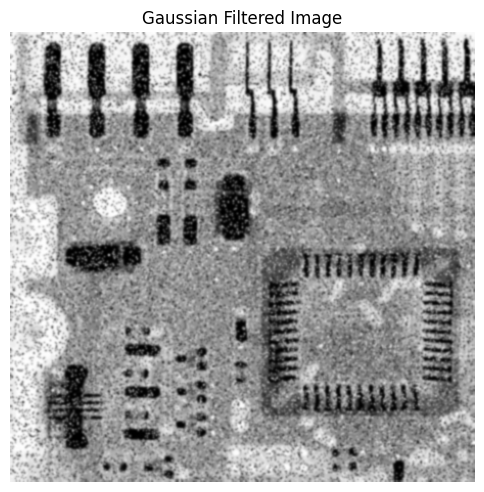

In [4]:
gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 1)

plt.figure(figsize=(6,6))
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')
plt.show()

## Sixth Problem Set 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Read and display the original image

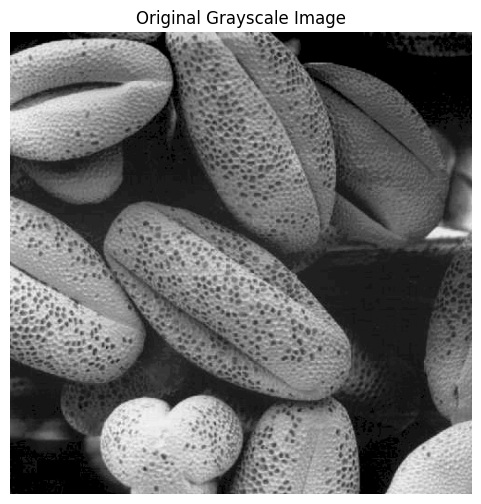

In [2]:
img = cv2.imread('pollen.tif', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

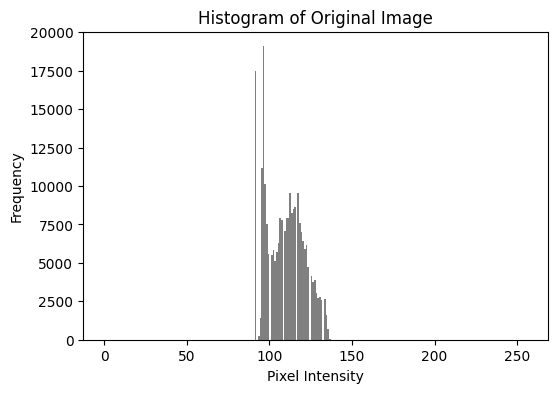

In [3]:
plt.figure(figsize=(6,4))
plt.hist(img.ravel(), bins=256, range=[0,256], color='gray')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [4]:
mean_intensity = np.mean(img)
std_dev = np.std(img)
print(f"Mean Intensity: {mean_intensity:.2f}")
print(f"Standard Deviation (Contrast): {std_dev:.2f}")

Mean Intensity: 109.08
Standard Deviation (Contrast): 11.49


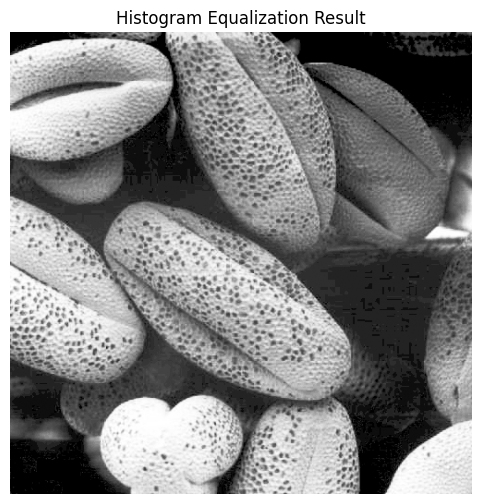

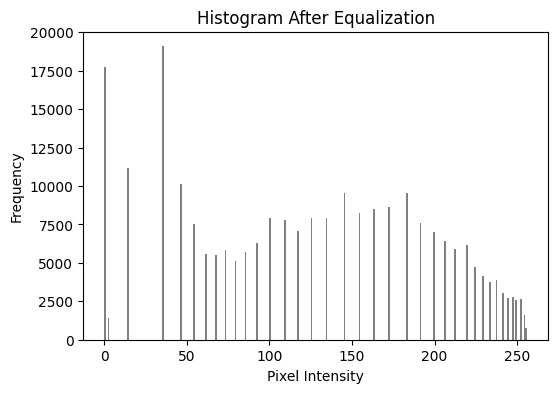

In [5]:
equalized = cv2.equalizeHist(img)

plt.figure(figsize=(6,6))
plt.imshow(equalized, cmap='gray')
plt.title('Histogram Equalization Result')
plt.axis('off')
plt.show()

# Histogram
plt.figure(figsize=(6,4))
plt.hist(equalized.ravel(), bins=256, range=[0,256], color='gray')
plt.title('Histogram After Equalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

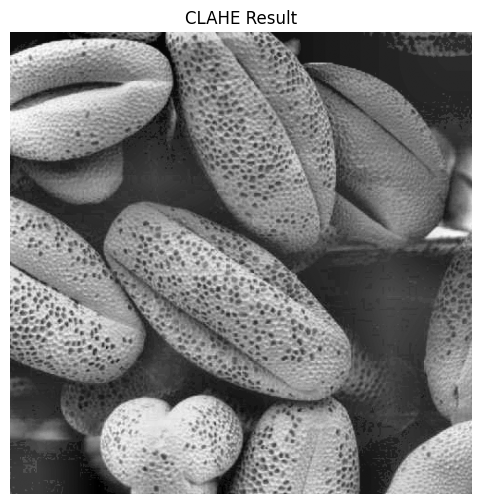

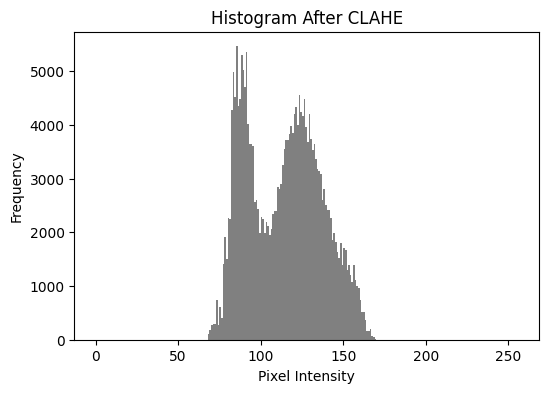

In [6]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img)

# Display
plt.figure(figsize=(6,6))
plt.imshow(clahe_img, cmap='gray')
plt.title('CLAHE Result')
plt.axis('off')
plt.show()

# Histogram
plt.figure(figsize=(6,4))
plt.hist(clahe_img.ravel(), bins=256, range=[0,256], color='gray')
plt.title('Histogram After CLAHE')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()